In [2]:
import numpy as np
import pandas as pd
import cfg
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import jieba
import seaborn as sns
import plotly.offline as py

py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter
from scipy.misc import imread
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

color = sns.color_palette()
with open('./data/stopword.txt', encoding='utf-8') as f:
    for line in f:
        STOPWORDS.add(line.strip())
print("stopwrod size:", len(STOPWORDS))

def seg_trim_stopword(text):
    words = jieba.cut(text)
    out = []
    for word in words:
        if word not in STOPWORDS:
            out.append(word)
    return ' '.join(out)

<script>requirejs.config({paths: { 'plotly': ['https://cdn.plot.ly/plotly-latest.min']},});if(!window.Plotly) {{require(['plotly'],function(plotly) {window.Plotly=plotly;});}}</script>

stopwrod size: 1446


In [3]:
df_all = pd.read_pickle(cfg.data_path + 'all_v2_1k.pkl')
print('df_all.shape: ', df_all.shape)

df_all.shape:  (1000, 4)


In [8]:
query_seg = []
seg_count = 0
for i in df_all['query']:
    query_seg.append(' '.join(jieba.lcut(i)))
    seg_count += 1
print('seg_count:', seg_count)
df_all['query_seg'] = query_seg

seg_count: 1000


In [8]:
query_seg_no_stopword = []
seg_count = 0
for i in df_all['query']:
    query_seg_no_stopword.append(seg_trim_stopword(i))
    seg_count += 1
print('seg_count:', seg_count)
df_all['query_seg_no_stopword'] = query_seg_no_stopword

seg_count: 1000
   Id  label                                              query   type  \
0   0      3  今年22岁，即将在2014年6月毕业的西昌学院大四学生吴学娅选择不大。作为食品专业的学生，她...  train   
1   1      2  “现在我们每天生产40万到50万个，回收4,000-5,000个包括我们生产的死灯泡。”他说...  train   
2   2      0  。记者悄悄来到医院二楼病房。只见一名睫毛浓密、皮肤黝黑的小姑娘被捆住双脚，躺在病床上。她就是...  train   
3   3      2  一带一路倡议被形容为针对印度。反华立场可以帮助印度政治家赢得选票。中国威胁论被夸大了一段时间...  train   
4   4      0  如同中国的金融体系没有在这次全球的金融危机中受到重大冲击是得益于中国尚未开放的资本市场和外汇...  train   

                                           query_seg  \
0  今年 22 岁 ， 即将 在 2014 年 6 月 毕业 的 西昌 学院 大四 学生 吴学娅...   
1  “ 现在 我们 每天 生产 40 万到 50 万个 ， 回收 4 , 000 - 5 , 0...   
2  。 记者 悄悄 来到 医院 二楼 病房 。 只见 一名 睫毛 浓密 、 皮肤 黝黑 的 小姑...   
3  一带 一路 倡议 被 形容 为 针对 印度 。 反华 立场 可以 帮助 印度 政治家 赢得 ...   
4  如同 中国 的 金融体系 没有 在 这次 全球 的 金融危机 中 受到 重大 冲击 是 得益...   

                               query_seg_no_stopword  query_length  
0  今年 22 岁 2014 毕业 西昌 学院 大四 学生 吴学娅 选择 食品 专业 学生 去年...           510  
1  现在 每天 生产 40 万到 50 万个 回收 000 000 包括 生产 死 灯泡 说 Y...           3

In [28]:
df_all['query_length'] = df_all['query'].str.len()

z = {0: 'Human Author', 1: 'Machine Author', 2: 'Machine Translate', 3: 'Machine Summary'}

# convert author labels into numerical variables
df_all['author_label'] = df_all.label.map(z)
# Check conversion for first 5 rows
print(df_all.iloc[:5])

df_all.to_pickle(cfg.data_path + 'df_all_1k.pkl')

   Id  label                                              query   type  \
0   0      3  今年22岁，即将在2014年6月毕业的西昌学院大四学生吴学娅选择不大。作为食品专业的学生，她...  train   
1   1      2  “现在我们每天生产40万到50万个，回收4,000-5,000个包括我们生产的死灯泡。”他说...  train   
2   2      0  。记者悄悄来到医院二楼病房。只见一名睫毛浓密、皮肤黝黑的小姑娘被捆住双脚，躺在病床上。她就是...  train   
3   3      2  一带一路倡议被形容为针对印度。反华立场可以帮助印度政治家赢得选票。中国威胁论被夸大了一段时间...  train   
4   4      0  如同中国的金融体系没有在这次全球的金融危机中受到重大冲击是得益于中国尚未开放的资本市场和外汇...  train   

                                           query_seg  \
0  今年 22 岁 ， 即将 在 2014 年 6 月 毕业 的 西昌 学院 大四 学生 吴学娅...   
1  “ 现在 我们 每天 生产 40 万到 50 万个 ， 回收 4 , 000 - 5 , 0...   
2  。 记者 悄悄 来到 医院 二楼 病房 。 只见 一名 睫毛 浓密 、 皮肤 黝黑 的 小姑...   
3  一带 一路 倡议 被 形容 为 针对 印度 。 反华 立场 可以 帮助 印度 政治家 赢得 ...   
4  如同 中国 的 金融体系 没有 在 这次 全球 的 金融危机 中 受到 重大 冲击 是 得益...   

                               query_seg_no_stopword  query_length  \
0  今年 22 岁 2014 毕业 西昌 学院 大四 学生 吴学娅 选择 食品 专业 学生 去年...           510   
1  现在 每天 生产 40 万到 50 万个 回收 000 000 包括 生产 死 灯泡 说 Y...           368   
2  记者 悄悄

In [9]:
df_tr = df_all.loc[df_all['type'] == 'train']
df_te = df_all.loc[df_all['type'] == 'test']
print('df_tr.shape: ',df_tr.shape)

df_tr.shape:  (900, 7)


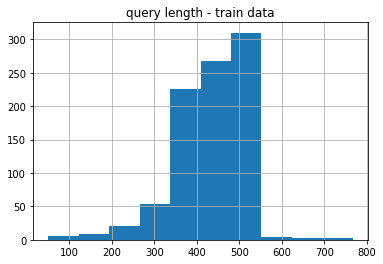

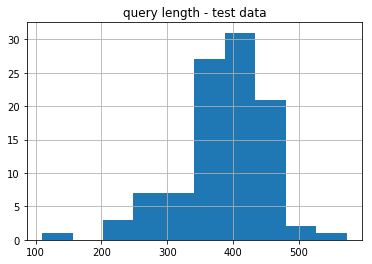

In [10]:
df_tr['query_length'].hist()
plt.title('query length - train data')
plt.show()

df_te['query_length'].hist()
plt.title('query length - test data')
plt.show()

In [17]:
# check the class distribution for the author label in train
print(df_tr['label'].value_counts())

0    300
2    216
1    195
3    189
Name: label, dtype: int64


   Id  label                                              query   type  \
2   2      0  。记者悄悄来到医院二楼病房。只见一名睫毛浓密、皮肤黝黑的小姑娘被捆住双脚，躺在病床上。她就是...  train   

                                           query_seg  \
2  。 记者 悄悄 来到 医院 二楼 病房 。 只见 一名 睫毛 浓密 、 皮肤 黝黑 的 小姑...   

                               query_seg_no_stopword  query_length  
2  记者 悄悄 来到 医院 二楼 病房 只见 一名 睫毛 浓密 皮肤 黝黑 小姑娘 捆住 双脚 ...           430  
count    300.000000
mean     430.540000
std       88.103362
min       53.000000
25%      384.750000
50%      465.000000
75%      497.000000
max      499.000000
Name: query_length, dtype: float64


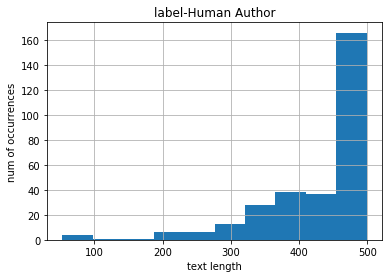

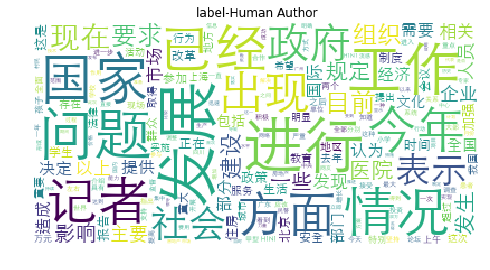

   Id  label                                              query   type  \
0   0      3  今年22岁，即将在2014年6月毕业的西昌学院大四学生吴学娅选择不大。作为食品专业的学生，她...  train   

                                           query_seg  \
0  今年 22 岁 ， 即将 在 2014 年 6 月 毕业 的 西昌 学院 大四 学生 吴学娅...   

                               query_seg_no_stopword  query_length  
0  今年 22 岁 2014 毕业 西昌 学院 大四 学生 吴学娅 选择 食品 专业 学生 去年...           510  
count    189.000000
mean     487.730159
std       41.206875
min      315.000000
25%      469.000000
50%      510.000000
75%      510.000000
max      510.000000
Name: query_length, dtype: float64


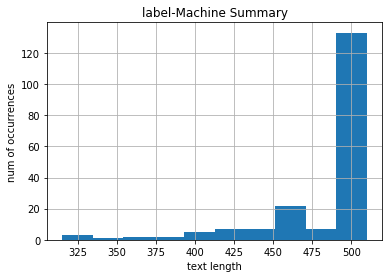

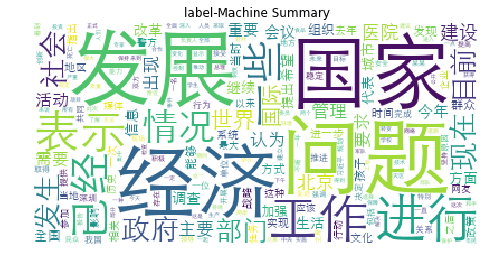

In [25]:
for lbl in [0, 3]:
# for lbl in [0, 1, 2, 3]:
    df_tr_label = df_tr.loc[df_tr['label'] == lbl]
    print(df_tr_label.iloc[:1])
    label_len = df_tr_label['query_length']
    print(label_len.describe())
    plt.figure()
    label_len.hist()
    plt.title('label-' + z[lbl])
    plt.xlabel('text length')
    plt.ylabel('num of occurrences')
    plt.show()
    
    text = ''
    for i in df_tr_label['query_seg']:
        text += i
    wc = WordCloud(background_color='white',  # 设置背景颜色
                   stopwords=STOPWORDS,  # 设置停用词
                   font_path='/System/Library/Fonts/STHeiti Light.ttc',
                   )
    wc.generate(text)
    plt.figure(figsize=(8, 6))
    plt.imshow(wc)
    plt.title('label-' + z[lbl])
    plt.axis('off')
    plt.show()

In [26]:
data = [go.Bar(
    x=df_tr.label.map(z).unique(),
    y=df_tr.label.value_counts().values,
    marker=dict(colorscale='Jet',
                color=df_tr.label.value_counts().values
                ),
    text='Text entries attributed to Author'
)]

layout = go.Layout(
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.plot(fig, filename=cfg.data_path + 'label-author.html')

'file:///Users/xuming06/Codes/ccf2016_sougou-master/data/label-author.html'

In [109]:
all_words = df_tr['query_seg_no_stopword'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
    x=all_words.index.values[2:50],
    y=all_words.values[2:50],
    marker=dict(colorscale='Jet',
                color=all_words.values[2:100]
                ),
    text='Word counts'
)]

layout = go.Layout(
    title='Top 50 (Uncleaned) Word frequencies in the training dataset'
)

fig = go.Figure(data=data, layout=layout)

py.plot(fig, filename=cfg.data_path + 'Top-50-(Uncleaned)-Word-frequencies.html')

'file:///Users/xuming06/Codes/ccf2016_sougou-master/data/Top-50-(Uncleaned)-Word-frequencies.html'

In [110]:
sentence = ["You love to eat Burgers",
            "Me love to eat Fries"]
vectorizer = CountVectorizer()
sentence_transform = vectorizer.fit_transform(sentence)

features = vectorizer.get_feature_names()
print('features: ', features)
print('vocab: ', vectorizer.vocabulary_)
print('vectorized array: ')
weight = sentence_transform.toarray()
print(weight)

for i in range(len(weight)):
    print(i, '个句子的词idf权重:')
    for j in range(len(features)):
        print(features[j], weight[i][j])
    print()

features:  ['burgers', 'eat', 'fries', 'love', 'me', 'to', 'you']
vocab:  {'you': 6, 'love': 3, 'to': 5, 'eat': 1, 'burgers': 0, 'me': 4, 'fries': 2}
vectorized array: 
[[1 1 0 1 0 1 1]
 [0 1 1 1 1 1 0]]
0 个句子的词idf权重:
burgers 1
eat 1
fries 0
love 1
me 0
to 1
you 1

1 个句子的词idf权重:
burgers 0
eat 1
fries 1
love 1
me 1
to 1
you 0



In [111]:
tf_vectorizer = TfidfVectorizer(max_df=0.95,
                                min_df=2,
                                decode_error='ignore')
tf = tf_vectorizer.fit_transform(df_all.query_seg_no_stopword)

feature_names = tf_vectorizer.get_feature_names()
count_vec = np.asarray(tf.sum(axis=0)).ravel()
zipped = list(zip(feature_names, count_vec))
x, y = (list(x) for x in zip(*sorted(zipped, key=lambda x: x[1], reverse=True)))
# Now I want to extract out on the top 15 and bottom 15 words
Y = np.concatenate([y[0:15], y[-16:-1]])
X = np.concatenate([x[0:15], x[-16:-1]])

# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(
    x=x[0:50],
    y=y[0:50],
    marker=dict(colorscale='Jet',
                color=y[0:50]
                ),
    text='Word TF-IDF counts'
)]

layout = go.Layout(
    title='Top 50 Word TF-IDF after Preprocessing'
)

fig = go.Figure(data=data, layout=layout)

py.plot(fig, filename=cfg.data_path + 'Top-50-Word-idf.html')

# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(
    x=x[-100:],
    y=y[-100:],
    marker=dict(colorscale='Portland',
                color=y[-100:]
                ),
    text='Word TF-IDF counts'
)]

layout = go.Layout(
    title='Bottom 100 Word TF-IDF after Preprocessing'
)

fig = go.Figure(data=data, layout=layout)

py.plot(fig, filename=cfg.data_path + 'Bottom-100-Word-idf.html')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



'file:///Users/xuming06/Codes/ccf2016_sougou-master/data/Bottom-100-Word-frequencies.html'

In [112]:
# Define helper function to print top words
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        print("=" * 70)

In [114]:
lda = LatentDirichletAllocation(max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_jobs=1, n_topics=10, perp_tol=0.1, random_state=0,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [115]:
n_top_words = 20
print("\nTopics in LDA model: ")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model: 

Topic #0:黄洁夫 江宁 捐献 一例 广州 主刀 讲解员 日晚 开放 触摸 22 器官 广州军区 壁画 总医院 移植手术 去年 女士 妇人 三例

Topic #1:东部 大部 北部 文化 西部 东北部 比赛 创造 内蒙古 湖南省 农业 澳大利亚 云南 南部 财政政策 肺部 撤离 结构性 早些时候 喊道

Topic #2:分钟 阵型 犯规 主场 博洛尼亚 进球 中场 黄牌 裁判 铁路 排出 替补 客队 球员 首发 建功 右路 迎战 主裁 锋线

Topic #3:烟花 品种 太湖 动物 工作 附近 游客 刘先生 录像 棉衣 位于 嫌疑人 有名 湿地 今年 当地 大国 古城 天空 新鲜

Topic #4:阅兵 海军 最终 这组 11 各国 问题 侵犯 婚姻 贪污 办公 渐渐 民用 专家 佩德罗 治安 黄海 庭上 110 追踪

Topic #5:国家 发展 问题 表示 已经 政府 工作 进行 经济 城市 10 市场 北京 一些 发生 情况 企业 认为 国际 现在

Topic #6:类型 平米 项目 配套 售价 公园 装修 周边 楼盘 产权 建筑 点评 特色 高层 医院 70 毛坯 号线 地址 三居

Topic #7:官员 政府 小学 海盗 网络 北京 反腐 难民 一名 部门 上海 每个 改革 叙利亚 16 国家 分子 新疆 1937 呼吁

Topic #8:乖离 个股 青岛 开往 亿元 次列车 站上 a股 走强 盘中 收报 上证综指 股票价格 今日 20 较大 收盘 成交额 刚刚 突破

Topic #9:孩子 村民 装置 比赛 塑料袋 泡沫 万安 盗贼 露出 经营者 爆炸 酒店 市民 厘米 当地 病毒 认定 慢慢 小院 暴力


In [116]:
first_topic = lda.components_[0]
second_topic = lda.components_[1]
third_topic = lda.components_[2]
fourth_topic = lda.components_[3]

print(first_topic.shape)

first_topic_words = [tf_feature_names[i] for i in first_topic.argsort()[:-50 - 1:-1]]
second_topic_words = [tf_feature_names[i] for i in second_topic.argsort()[:-50 - 1:-1]]
third_topic_words = [tf_feature_names[i] for i in third_topic.argsort()[:-50 - 1:-1]]
fourth_topic_words = [tf_feature_names[i] for i in fourth_topic.argsort()[:-50 - 1:-1]]

print(first_topic_words[:10])

(6883,)
['黄洁夫', '江宁', '捐献', '一例', '广州', '主刀', '讲解员', '日晚', '开放', '触摸']


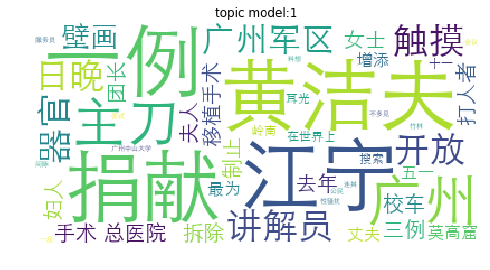

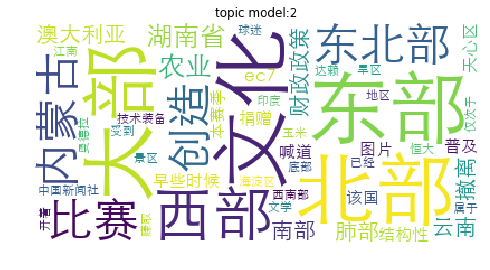

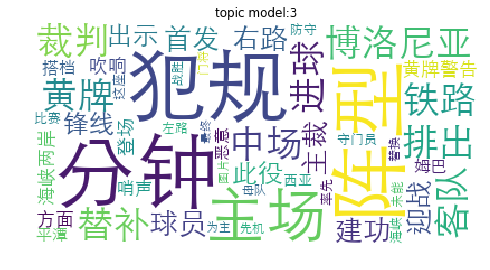

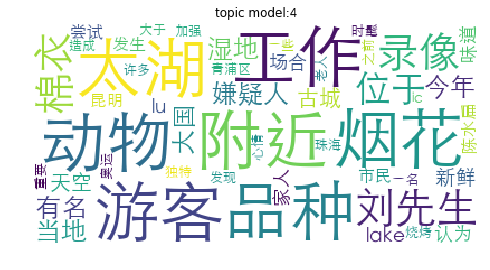

In [119]:
index = 1
# Generating the wordcloud with the values under the category dataframe
for i in [first_topic_words, second_topic_words, third_topic_words, fourth_topic_words]:
    text = " ".join(i)
    cloud = WordCloud(
        stopwords=STOPWORDS,
        background_color='white',
        font_path='/System/Library/Fonts/STHeiti Light.ttc',
    )
    cloud.generate(text)
    plt.figure(figsize=(8, 6))
    plt.imshow(cloud)
    plt.title('topic model:' + str(index))
    plt.axis('off')
    plt.show()
    index += 1